$$
\mathbf{x}_v^{(\ell + 1)} = f^{(\ell + 1)}_{\theta} \left( \mathbf{x}_v^{(\ell)}, \left\{ \mathbf{x}_w^{(\ell)} : w \in \mathcal{N}(v) \right\} \right)
$$

In [1]:
import torch
from torch_geometric.data import Data
# from torch_geometric.datasets import KarateClub

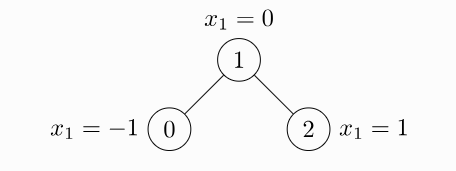

### 一种建图方式

In [3]:
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1, -1], [0, 0], [1, 1]])
data = Data(x=x, edge_index=edge_index)
print(data.x)
print(data.edge_index)

tensor([[-1, -1],
        [ 0,  0],
        [ 1,  1]])
tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])


### 另一种建图方式

In [36]:
edge_index = torch.tensor([[0, 1], [1, 0], [1, 2]])
# contiguous:相接
data=Data(x=x,edge_index=edge_index.t().contiguous())
data

Data(x=[3, 2], edge_index=[2, 3])

In [37]:
# 检查边idx是否为{0，1，……，-1}
data.validate()

True

In [38]:
for key,item in data:
    print(key,':\n',item)

x :
 tensor([[-1, -1],
        [ 0,  0],
        [ 1,  1]])
edge_index :
 tensor([[0, 1, 1],
        [1, 0, 2]])


In [39]:
# 无边特征
data.edge_attr in data

False

In [41]:
print(data.num_edges)
print(data.num_edge_features)

print(data.num_nodes)
print(data.num_node_features)

print(data.has_isolated_nodes()) # 孤立
print(data.has_self_loops()) #
print(data.is_directed()) # 有向图，如果两个节点互相有两个箭头，则变成无向

3
0
3
2
False
False
True


In [44]:
device=torch.device('cuda')
data=data.to(device)

In [46]:
print(data.is_cuda)

True
